In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
data = iris.data

# Split the data into training (70%) and testing (30%) sets
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

### K-Means Clustering

In [3]:
from sklearn.cluster import KMeans

def run_kmeans(data, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data)
    return kmeans

# Run K-Means on training data
kmeans_model = run_kmeans(train_data)


### Hierarchical Clustering

In [5]:
from sklearn.cluster import AgglomerativeClustering

def run_hierarchical(data, n_clusters=3):
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    hierarchical.fit(data)
    return hierarchical

# Run Hierarchical Clustering on training data
hierarchical_model = run_hierarchical(train_data)


### Apply Clustering to Test Data

#### K-Means Predictions

In [6]:
test_clusters_kmeans = kmeans_model.predict(test_data)


#### Hierarchical Predictions

In [7]:
import numpy as np

def predict_hierarchical(model, train_data, test_data):
    from scipy.spatial.distance import cdist
    centroids = np.array([train_data[model.labels_ == i].mean(axis=0) for i in range(model.n_clusters)])
    distances = cdist(test_data, centroids, 'euclidean')
    return np.argmin(distances, axis=1)

test_clusters_hierarchical = predict_hierarchical(hierarchical_model, train_data, test_data)


#### Visualise the data set

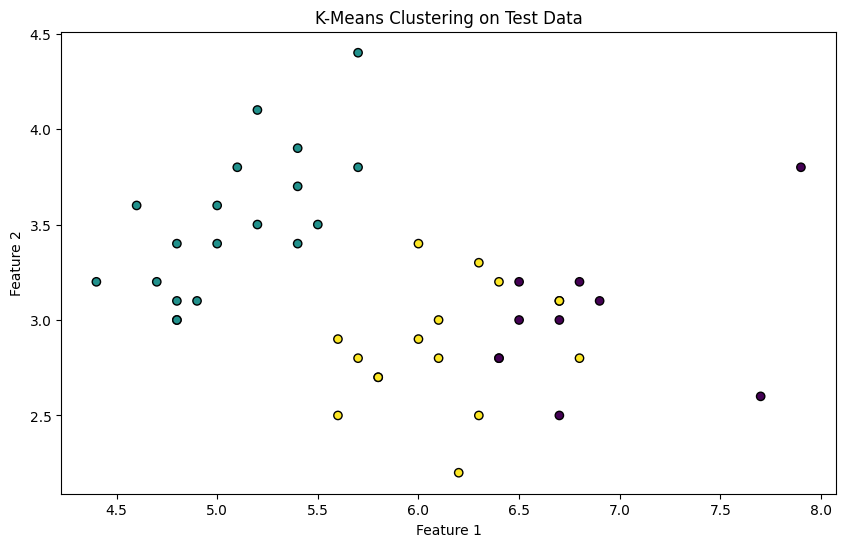

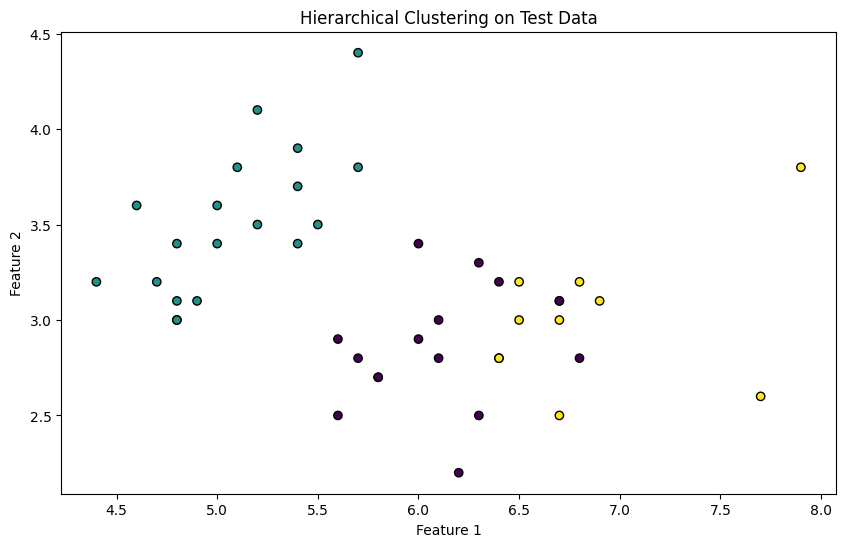

In [8]:
import matplotlib.pyplot as plt

# Plotting function for visualizing clusters
def plot_clusters(data, labels, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Visualize K-Means clusters on test data
plot_clusters(test_data, test_clusters_kmeans, 'K-Means Clustering on Test Data')

# Visualize Hierarchical clusters on test data
plot_clusters(test_data, test_clusters_hierarchical, 'Hierarchical Clustering on Test Data')


#### Table of clusters

In [19]:
# Create a DataFrame to show cluster assignments for test data
import pandas as pd

# Create a DataFrame to show cluster assignments for test data
results_df = pd.DataFrame({
    'Test Data Point': range(len(test_data)),
    'K-Means Cluster': test_clusters_kmeans,
    'Hierarchical Cluster': test_clusters_hierarchical
})

# Display the DataFrame
print("Clustering Results")
print(results_df.head())


Clustering Results
   Test Data Point  K-Means Cluster  Hierarchical Cluster
0                0                2                     0
1                1                1                     1
2                2                0                     2
3                3                2                     0
4                4                2                     0
